In [329]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [346]:
#Load both train and test dataset
train_data = pd.read_csv('train_wn75k28.csv')
test_data = pd.read_csv('test_Wf7sxXF.csv')

In [331]:
# get id values of test data
id = test_data.iloc[:,0]
id

0        39162
1        39163
2        39164
3        39165
4        39166
         ...  
13179    52341
13180    52342
13181    52343
13182    52344
13183    52345
Name: id, Length: 13184, dtype: int64

In [332]:
#show 5 rows of train data
train_data.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [333]:
#show 5 rows of test data
test_data.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0
2,39164,2022-01-01,8,7,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0,0
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0


### EDA and Feature Engineering

In [334]:
#find number of rows and columns(shape)
train_data.shape, test_data.shape

((39161, 19), (13184, 18))

In [335]:
#Data describe
train_data.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
count,39161.000000,39161.000000,39161.000000,18250.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000
mean,19581.000000,6.523812,6.452746,2.154137,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.011440,0.000383,0.218942,0.000562,0.051020
std,11304.951283,3.472944,2.614296,0.779815,0.509194,0.081676,0.303743,0.106463,0.359681,0.558166,0.455784,0.379689,0.106346,0.019568,0.431544,0.023696,0.220042
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9791.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19581.000000,6.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29371.000000,9.000000,8.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39161.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [336]:
#get data info like not null count and dtypes
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

In [339]:
#total Null values in train data
train_data.isnull().sum()

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

#### there are two columns which have missing values products_purchased, signup_date.

In [338]:
#total null values in test data
test_data.isnull().sum()

id                         0
created_at                 0
campaign_var_1             0
campaign_var_2             0
products_purchased      8136
signup_date             6649
user_activity_var_1        0
user_activity_var_2        0
user_activity_var_3        0
user_activity_var_4        0
user_activity_var_5        0
user_activity_var_6        0
user_activity_var_7        0
user_activity_var_8        0
user_activity_var_9        0
user_activity_var_10       0
user_activity_var_11       0
user_activity_var_12       0
dtype: int64

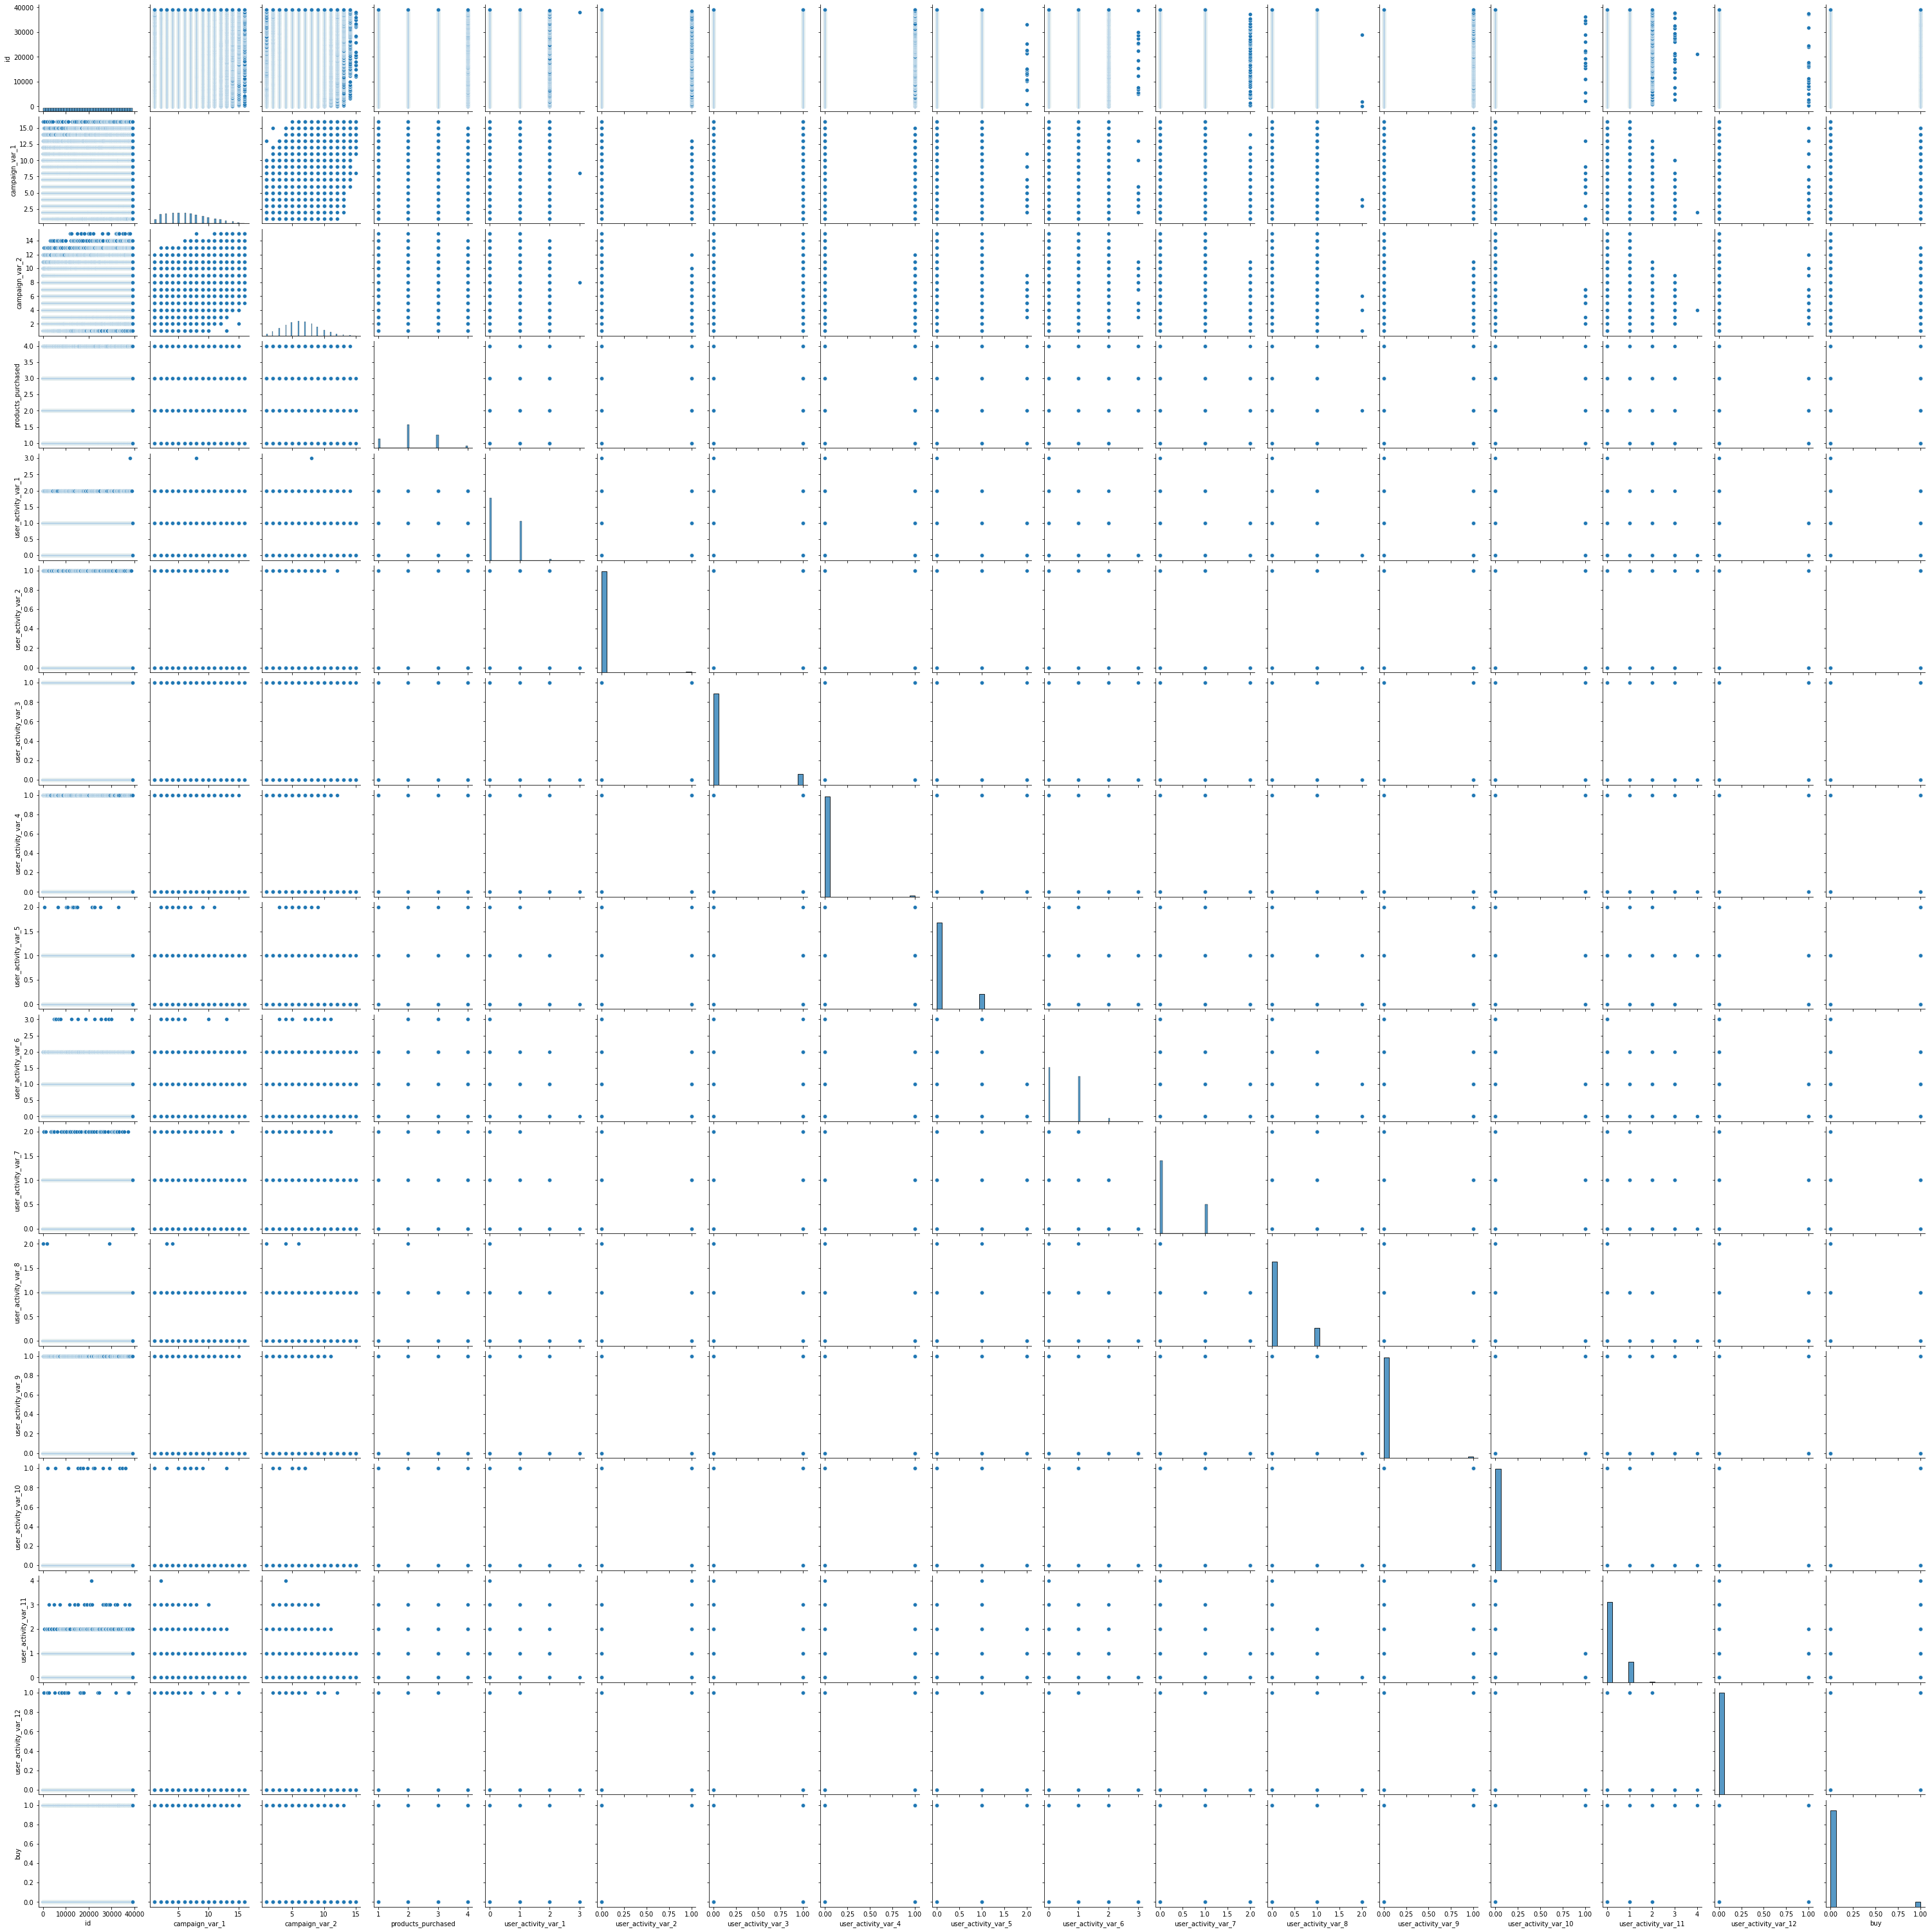

In [340]:
#pairplot of train data
sns.pairplot(train_data)

In [248]:
#find out numerical and categorical features
categorical = [feature for feature in train_data.columns if train_data[feature].dtypes =='object']
numerical = [feature for feature in train_data.columns if train_data[feature].dtypes != 'object']

### Handling mising values

In [347]:
#value counts of product_purchased column
train_data['products_purchased'].value_counts()

2.0    8867
3.0    5024
1.0    3643
4.0     716
Name: products_purchased, dtype: int64

In [348]:
#fill NaN values with 0 in products_purchased column
train_data['products_purchased'] = train_data['products_purchased'].fillna(0.0)
test_data['products_purchased'] = test_data['products_purchased'].fillna(0.0)

In [349]:
#updated value counts of product_purchased column
train_data['products_purchased'].value_counts()

0.0    20911
2.0     8867
3.0     5024
1.0     3643
4.0      716
Name: products_purchased, dtype: int64

In [350]:
#changing dtype of product_purchased column
train_data['products_purchased'] = train_data['products_purchased'].astype('int64')
test_data['products_purchased'] = test_data['products_purchased'].astype('int64')

train_data['products_purchased'].dtypes

dtype('int64')

In [351]:
# using bfill and ffill method to fill null values in signup_date column in train and test data
train_data['signup_date'] = train_data['signup_date'].bfill()
test_data['signup_date'] = test_data['signup_date'].bfill()
test_data['signup_date'] = test_data['signup_date'].ffill()

In [352]:
#values counts in signup_date column
train_data['signup_date'].value_counts()

2021-01-28    75
2021-07-18    69
2021-09-10    66
2021-12-18    66
2021-06-17    64
              ..
2017-01-16     1
2018-07-14     1
2017-08-07     1
2017-04-24     1
2015-12-10     1
Name: signup_date, Length: 1800, dtype: int64

In [353]:
# 0 null in signup_date column
train_data['signup_date'].isnull().sum()

0

In [354]:
# changing dtypes of created_at and signup_date columns in train and test data
train_data['created_at'] = pd.to_datetime(train_data['created_at'])
train_data['signup_date'] = pd.to_datetime(train_data['signup_date'])
test_data['created_at'] = pd.to_datetime(test_data['created_at'])
test_data['signup_date'] = pd.to_datetime(test_data['signup_date'])


In [355]:
#dtype of train data
train_data.dtypes

id                               int64
created_at              datetime64[ns]
campaign_var_1                   int64
campaign_var_2                   int64
products_purchased               int64
signup_date             datetime64[ns]
user_activity_var_1              int64
user_activity_var_2              int64
user_activity_var_3              int64
user_activity_var_4              int64
user_activity_var_5              int64
user_activity_var_6              int64
user_activity_var_7              int64
user_activity_var_8              int64
user_activity_var_9              int64
user_activity_var_10             int64
user_activity_var_11             int64
user_activity_var_12             int64
buy                              int64
dtype: object

In [356]:
#created new column by subtracting two date column 
train_data['no_of_days'] = train_data['created_at'] - train_data['signup_date']

In [359]:
#dtype of no_of_days column
train_data['no_of_days'].dtypes

dtype('int64')

In [360]:
#created new column by subtracting two date column and change dtype by using dt.days

train_data['no_of_days'] = (train_data['created_at'] - train_data['signup_date']).dt.days
test_data['no_of_days'] = (test_data['created_at'] - test_data['signup_date']).dt.days

In [361]:
#new dtype of no_of_days column
train_data['no_of_days'].dtypes

dtype('int64')

In [362]:
#pop new column
col = train_data.pop('no_of_days')

In [363]:
#insert into just before buy column
train_data.insert(18, 'no_of_days', col)

In [364]:
#show data
train_data.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,no_of_days,buy
0,1,2021-01-01,1,2,2,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,99,0
1,2,2021-01-01,2,1,2,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,104,0
2,3,2021-01-01,9,3,3,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,-222,0
3,4,2021-01-01,6,7,2,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,1185,0
4,5,2021-01-01,4,6,0,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,207,0


In [367]:
#correlation between features
corr = train_data.corr()
corr

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,no_of_days,buy
id,1.000000,0.143723,0.222746,-0.078714,0.012223,-0.011075,-0.000572,-0.015203,-0.006575,0.013992,0.016137,-0.035218,-0.019808,0.001002,0.025785,-0.009223,0.083478,-0.020762
campaign_var_1,0.143723,1.000000,0.561489,-0.114655,0.024100,-0.034548,-0.012670,-0.033510,-0.023116,0.029665,-0.072600,-0.014276,-0.058264,-0.004831,-0.022000,-0.006369,0.061538,-0.087202
campaign_var_2,0.222746,0.561489,1.000000,-0.072100,-0.032969,-0.039833,-0.008046,-0.038928,-0.030990,0.067304,-0.053462,-0.033848,-0.057942,-0.009879,-0.003890,-0.008228,0.051398,-0.080064
products_purchased,-0.078714,-0.114655,-0.072100,1.000000,-0.025418,0.004166,0.015239,0.004052,0.012253,0.011332,0.026557,-0.056785,0.013268,0.008642,0.010743,-0.000975,0.098703,0.005830
user_activity_var_1,0.012223,0.024100,-0.032969,-0.025418,1.000000,0.014599,-0.025950,0.016656,-0.015441,-0.190784,-0.085343,-0.047157,0.034783,0.012811,-0.062915,0.002535,0.006665,0.044811
user_activity_var_2,-0.011075,-0.034548,-0.039833,0.004166,0.014599,1.000000,-0.001075,0.132108,0.060982,-0.005297,-0.020153,-0.035306,0.155794,0.046324,0.085794,0.024440,0.022305,0.354627
user_activity_var_3,-0.000572,-0.012670,-0.008046,0.015239,-0.025950,-0.001075,1.000000,0.003023,0.023117,-0.050132,-0.006306,-0.025562,0.003898,0.019152,-0.027212,0.013261,0.000439,0.005174
user_activity_var_4,-0.015203,-0.033510,-0.038928,0.004052,0.016656,0.132108,0.003023,1.000000,0.071339,-0.021669,-0.004572,-0.039370,0.204941,0.046924,0.067085,0.037937,0.030597,0.394706
user_activity_var_5,-0.006575,-0.023116,-0.030990,0.012253,-0.015441,0.060982,0.023117,0.071339,1.000000,-0.078928,-0.007705,-0.031585,0.074189,0.028037,0.021225,0.022972,0.030196,0.164972
user_activity_var_6,0.013992,0.029665,0.067304,0.011332,-0.190784,-0.005297,-0.050132,-0.021669,-0.078928,1.000000,-0.169651,-0.062460,-0.013304,0.001175,-0.076816,0.001938,-0.011342,-0.010951


<AxesSubplot:>

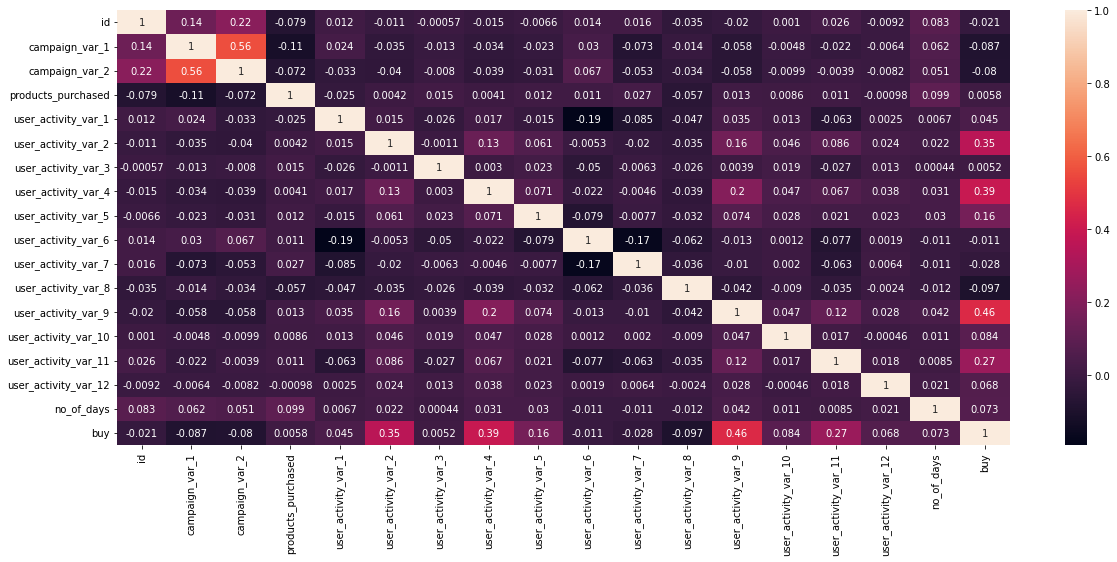

In [371]:
#heatmap of correlation
plt.figure(figsize = (20,8))
sns.heatmap(corr, annot = True)

In [372]:
# 0 null values in train data
train_data.isnull().sum()

id                      0
created_at              0
campaign_var_1          0
campaign_var_2          0
products_purchased      0
signup_date             0
user_activity_var_1     0
user_activity_var_2     0
user_activity_var_3     0
user_activity_var_4     0
user_activity_var_5     0
user_activity_var_6     0
user_activity_var_7     0
user_activity_var_8     0
user_activity_var_9     0
user_activity_var_10    0
user_activity_var_11    0
user_activity_var_12    0
no_of_days              0
buy                     0
dtype: int64

In [373]:
# 0 null values in test data
test_data.isnull().sum()

id                      0
created_at              0
campaign_var_1          0
campaign_var_2          0
products_purchased      0
signup_date             0
user_activity_var_1     0
user_activity_var_2     0
user_activity_var_3     0
user_activity_var_4     0
user_activity_var_5     0
user_activity_var_6     0
user_activity_var_7     0
user_activity_var_8     0
user_activity_var_9     0
user_activity_var_10    0
user_activity_var_11    0
user_activity_var_12    0
no_of_days              0
dtype: int64

In [374]:
#drop id, created_at, signup_date columns
train_data.drop(['id','created_at', 'signup_date'], axis = 1, inplace = True)
test_data.drop(['id','created_at', 'signup_date'], axis = 1, inplace = True)

In [375]:
#show data
train_data.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,no_of_days,buy
0,1,2,2,0,0,0,0,0,0,1,1,0,0,0,0,99,0
1,2,1,2,1,0,1,0,0,0,1,0,0,0,0,0,104,0
2,9,3,3,1,0,0,0,0,0,0,0,0,0,0,0,-222,0
3,6,7,2,0,0,0,0,0,0,0,0,0,0,0,0,1185,0
4,4,6,0,0,0,0,0,0,0,1,0,0,0,1,0,207,0


<AxesSubplot:xlabel='products_purchased', ylabel='count'>

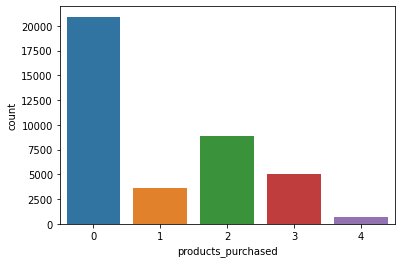

In [376]:
#draw count graph of product_puchased column
sns.countplot(x = 'products_purchased', data = train_data)

In [379]:
#values of 1 and 0 in dependent column
train_data['buy'].value_counts()

0    37163
1     1998
Name: buy, dtype: int64

<AxesSubplot:xlabel='buy', ylabel='count'>

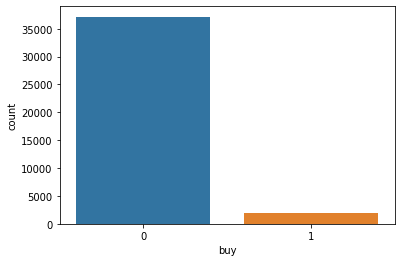

In [377]:
#draw count graph of buy column
sns.countplot(x = 'buy', data = train_data)

In [378]:
#split data into independent and dependent features
X = train_data.drop('buy', axis = 1)
y = train_data.iloc[:,-1]

In [380]:
#Scaling independent features using standardscaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [381]:
#Scaling test data using standardscaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
test_data=sc.fit_transform(test_data)

In [464]:
#split data into train and test data for training and testing model using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.25, random_state=100)

In [465]:
#importing usful models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [466]:
# creating object of each model and store in key value pair
models = {}

# Logistic Regression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
models['Support Vector Machines'] = LinearSVC(max_iter=2000)

# Decision Trees
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [467]:
#train data in each model and calculate accuracy, precision, recall and F1 score
accuracy, precision, recall, f1= {}, {}, {}, {}

for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(X_train, y_train)
    
    # Prediction 
    predictions = models[key].predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)
    f1[key] = f1_score(predictions, y_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [468]:
#creating dataframe which store all accuracy, precision, recall and F1 score and store in that dataframe
data_model = pd.DataFrame(index = models.keys(), columns = ['Accuracy', 'Precision', 'Recall', 'F1 Score'])


In [469]:
#assigning values to that dataframe
data_model['Accuracy'] = accuracy.values()
data_model['Precision'] = precision.values()
data_model['Recall'] = recall.values()
data_model['F1 Score'] = f1.values()

In [470]:
#show dataframe
data_model

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.975896,0.533477,0.925094,0.676712
Support Vector Machines,0.973241,0.479482,0.913580,0.628895
Decision Trees,0.953631,0.576674,0.508571,0.540486
Random Forest,0.975692,0.552916,0.891986,0.682667
Naive Bayes,0.973241,0.479482,0.913580,0.628895
K-Nearest Neighbor,0.975181,0.546436,0.884615,0.675567


In [471]:
#sort values by F1 score in descending order
data_model.sort_values(by = 'F1 Score', ascending = False)

,Accuracy,Precision,Recall,F1 Score
Random Forest,0.975692,0.552916,0.891986,0.682667
Logistic Regression,0.975896,0.533477,0.925094,0.676712
K-Nearest Neighbor,0.975181,0.546436,0.884615,0.675567
Support Vector Machines,0.973241,0.479482,0.913580,0.628895
Naive Bayes,0.973241,0.479482,0.913580,0.628895
Decision Trees,0.953631,0.576674,0.508571,0.540486


#### Using Randomized search cv on random forest and found  F1 score is less than what we get in normal.

In [476]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf = RandomForestClassifier()

In [477]:
#fit model on best parameter
rgrid_search = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, scoring='accuracy',cv=5, n_jobs=-1, verbose=2)
rgrid_fit = rgrid_search.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [478]:
#best parameter
rgrid_fit.best_params_

{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [479]:
#best score
rgrid_fit.best_score_

0.9740892066734762

In [480]:
#prediction on X_test data
predict2 = rgrid_fit.predict(X_test)

In [481]:
#prediciton F1 score
f1 = f1_score(predict2, y_test)
f1

0.6812585499316005

In [482]:
precision_score(predict2, y_test)

0.5377969762419006

In [483]:
#prediction on test_data
pred_rs = rgrid_fit.predict(test_data)

In [484]:
#convert array into series
buy_rs = pd.Series(pred_rs)
buy_rs

0        1
1        0
2        0
3        1
4        0
        ..
13179    0
13180    0
13181    0
13182    0
13183    0
Length: 13184, dtype: int64

In [485]:
#values counts of 0 and 1
buy_rs.value_counts()

0    12856
1      328
dtype: int64

In [486]:
lst3 = list(zip(id.values, buy_r.values))
RRsubmission = pd.DataFrame(lst3, columns = ['id', 'buy'])
RRsubmission.to_csv('RRsubmission.csv', index = False)

#### calculate prediction on test data using normal random forest

In [487]:
#prediction on test_data
pred_r = models['Random Forest'].predict(test_data)

In [488]:
#convert array into series
buy_r = pd.Series(pred_r)
buy_r

0        1
1        0
2        0
3        1
4        0
        ..
13179    0
13180    0
13181    0
13182    0
13183    0
Length: 13184, dtype: int64

In [489]:
#values counts of 0 and 1
buy_r.value_counts()

0    12820
1      364
dtype: int64

In [490]:
# map id and buy values and create dataframe and save that file
lst2 = list(zip(id.values, buy_r.values))
Rsubmission = pd.DataFrame(lst2, columns = ['id', 'buy'])
Rsubmission.to_csv('Rsubmission.csv', index = False)